In [ ]:
# default_exp core

# Voynich decoding attempts

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

# Idea: frequency count of all words, which are most common

In [1]:
# frequency count using  code from https://gist.github.com/nmpowell/f3faf7496bf9d915579f 'Nick Powell (PhD student, CMIC & CABI, UCL, UK), nicholas.powell.11@ucl.ac.uk'
import os
import sys
import string
import argparse
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [22]:
#put file info here
rawfilepath = 'transcriptions/frogguy.txt'

#and number of results desired
top_n = 200

In [3]:
# Load the file
    filepath = os.path.normpath(os.path.join(rawfilepath))
    file = open(filepath, 'r')

In [4]:
 # Parse as a list, removing lines
    content_sublists = [line.split(',') for line in file.readlines()]

In [5]:
 # Parse into a single list (from a list of lists)
    content_list = [item for sublist in content_sublists for item in sublist]

In [6]:
 # Remove whitespace so we can concatenate appropriately, and unify case
    content_list_strip = [str.strip().lower() for str in content_list]

In [7]:
 # Concatenate strings into a single string
    content_concat = ' '.join(content_list_strip)

In [8]:
#  MP- TESTING this step to replace period with space?
 #  content_concat2 = [w.replace('.', ' ') for w in content_concat]
content_concat2 = content_concat.replace(".", " ") 


In [10]:
# Remove punctuation and new lines
    punct = set(string.punctuation)
    unpunct_content = ''.join(x for x in content_concat2 if x not in punct)

In [11]:
# Split string into list of strings, again
    word_list = unpunct_content.split()

In [12]:
 # Perform count
    counts_all = Counter(word_list)
    words, count_values = zip(*counts_all.items())

In [13]:
# Sort both lists by frequency in values (Schwartzian transform) - thanks, http://stackoverflow.com/questions/9543211/sorting-a-list-in-python-using-the-result-from-sorting-another-list
    values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

In [23]:
 # Top N
    words_sorted_top = words_sorted[0:top_n]
    values_sorted_top = values_sorted[0:top_n]

In [25]:
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("{0} unique words identified in the text file, {1}".format(len(values_sorted), filepath))
print("The top {0} words are: \n{1}".format(top_n, words_sorted_top))
print("... their respective frequencies: \n{0}".format(values_sorted_top))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Pandas DataFrame just for visualisation
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
print("{0}".format(df))
sys.stdout.flush()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
7428 unique words identified in the text file, transcriptions/frogguy.txt
The top 200 words are: 
('ctc89', '8aiiv', 'ctc9', 'ctox', 'ox', 'aiiv', 'o2', 'a2', '8a2', 'ctcc9', 'cto2', '4olpcc9', '4olpcc89', 'ctcox', '4olpaiv', '4olpc89', '89', '4olpaiiv', 'ax', 'ct9', '8ax', 's', 'olpaiiv', '8aiv', 'ctclpt9', 'cto', 'ct89', '4olpax', 'olpcc9', 'xctc89', 'oqpc89', 'oqpaiiv', '4olpa2', '9', 'ctco2', '4ox', 'cto89', '4olp9', 'olpaiv', 'saiiv', 'oqpax', 'ctcc89', 'oqpa2', 'oqpcc9', 'ctco89', 'olpax', 'olpa2', 'olpc89', '8ox', 'oqp9', 'ctco', 'cqpt9', 'ctcqpt9', '4olpc9', 'cta2', '8ai2', '4olpox', 'olpcc89', 'ctclp9', 'olp9', 'oqpcc89', '8aig', '2', 'oqpaiv', 'aiv', '4oqpc89', 'aig', '4oqp9', 'oqpox', 'sa2', 'o', 'olpox', 'ctcclpt9', '4oqpaiiv', '4olpct9', 'sox', '2aiiv', '4oqpcc89', 'ai2', '8o2', 'ctca2', '4oqpct9', 'saiv', 'cto8aiiv', 'olpcox', 'ctaiiv', 'lpaiiv', 'olpc9', '4oqpaiv', 'ctax', '4oqpa2', 'xctc9', '8ctc89', 'o8a

In [26]:
 # Histogram
    
# Make xticklabels comprehensible by matplotlib
xticklabels = str(list(words_sorted_top)).split()

# Remove the single quotes, commas and enclosing square brackets
xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]

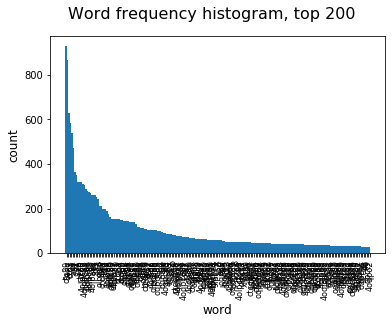

In [27]:
indices = np.arange(len(words_sorted_top))
width = 1
fig = plt.figure()
fig.suptitle('Word frequency histogram, top {0}'.format(top_n), fontsize=16)
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.bar(indices, values_sorted_top, width)
plt.xticks(indices + width * 0.5, xtlabs, rotation='vertical', fontsize=8)
plt.show()


In [29]:
pd.set_option('display.max_rows', None)

In [30]:
df


,count,word
0,928,ctc89
1,864,8aiiv
2,627,ctc9
3,584,ctox
4,538,ox
5,470,aiiv
6,366,o2
7,352,a2
8,319,8a2
9,318,ctcc9


In [ ]:
from nbdev.export import *
notebook2script()